In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data:
The chart above showcases the top 10 highest averaged Rotten Tomatoes scores given by Rotten Tomatoes critics and Rotten Tomatoes Users to movies released in 2014-2015 (source). First, import the data using:

In [2]:
df = pd.read_csv("fandango.csv")
df

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


Next, let’s store and rename some of the categories of data so we don’t have to constantly refer back to it (d). In particular, we want to rename the columns FILM, RottenTomatoes, and RottenTomatoes_User

In [3]:
df.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [4]:
df.columns = ['film', 'rotten_tomatoes', 'rotten_tomatoes_user', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference']

In [5]:
df.head()

,film,rotten_tomatoes,rotten_tomatoes_user,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


Step 1

Calculate the average score between the columns rotten_tomatoes and rotten_tomatoes_user for each film and store this information in a variable. Note: rotten_tomatoes represents the average scores given by critics and rotten_tomatoes_user represents the average scores given by users.

In [6]:
rottentomatoesavg = df.rotten_tomatoes.mean()
rottentomatoesavg

60.84931506849315

In [7]:
rottentomatoesuseravg = df.rotten_tomatoes_user.mean()
rottentomatoesuseravg

63.87671232876713

Step 2

Create a data frame that contains the following information:
    
- film
- rotten_tomatoes
- rotten_tomatoes_user
- The averages between rotten_tomatoes and rotten_tomatoes_user


In [8]:
df.nunique()

film                          146
rotten_tomatoes                72
rotten_tomatoes_user           68
Metacritic                     69
Metacritic_User                54
IMDB                           41
Fandango_Stars                  5
Fandango_Ratingvalue           21
RT_norm                        72
RT_user_norm                   68
Metacritic_norm                69
Metacritic_user_nom            54
IMDB_norm                      41
RT_norm_round                  10
RT_user_norm_round              8
Metacritic_norm_round           9
Metacritic_user_norm_round      9
IMDB_norm_round                 6
Metacritic_user_vote_count    109
IMDB_user_vote_count          146
Fandango_votes                140
Fandango_Difference             6
dtype: int64

In [9]:
df["averages"] = (df["rotten_tomatoes_user"] + df["rotten_tomatoes"]) / 2

In [10]:
df.head()

,film,rotten_tomatoes,rotten_tomatoes_user,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,averages
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5,80.0
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5,82.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5,85.0
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,51.0
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5,21.0


In [11]:
df2 = df[['film', 'rotten_tomatoes', 'rotten_tomatoes_user', 'averages']]

In [12]:
df2

,film,rotten_tomatoes,rotten_tomatoes_user,averages
0,Avengers: Age of Ultron (2015),74,86,80.0
1,Cinderella (2015),85,80,82.5
2,Ant-Man (2015),80,90,85.0
3,Do You Believe? (2015),18,84,51.0
4,Hot Tub Time Machine 2 (2015),14,28,21.0
...,...,...,...,...
141,Mr. Holmes (2015),87,78,82.5
142,'71 (2015),97,82,89.5
143,"Two Days, One Night (2014)",97,78,87.5
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90.5


In [13]:
df2.set_index("film", inplace=True)

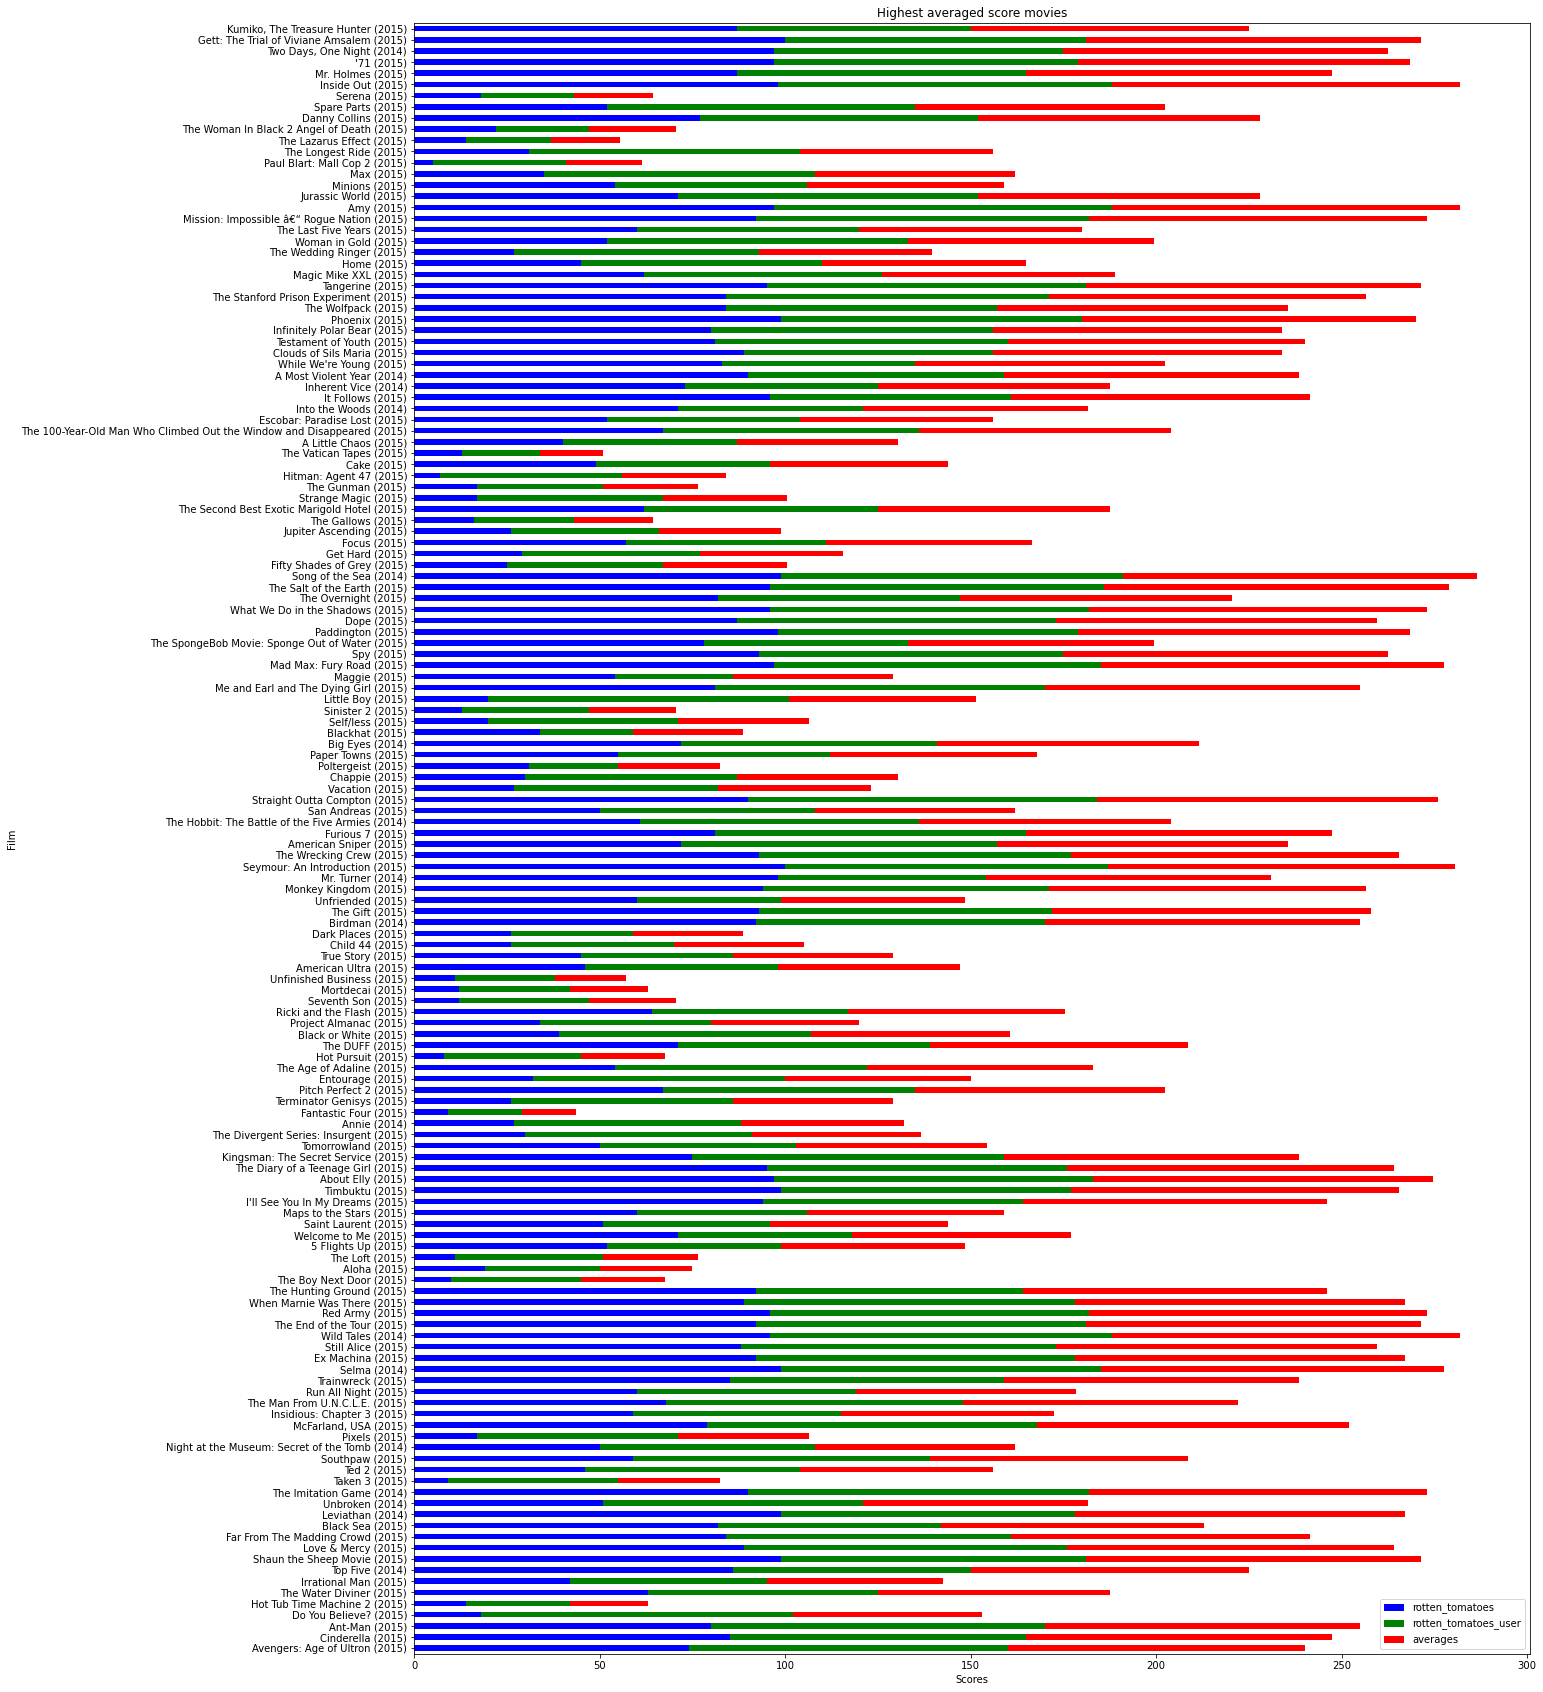

In [14]:
df2.plot(kind='barh', stacked=True, color=['blue','green', 'red'], figsize=(20,30))
plt.title('Highest averaged score movies')
plt.xlabel('Scores')
plt.ylabel('Film')
plt.show()